### Exercice 1: Initialisation et Analyse de Forme 

In [ ]:
import pandas as pd

# Setup des chemins
FILE_PATH = '../data/raw/dataset.xlsx'

In [ ]:

try:
    # Khassk tkun installiti openpyxl qbl (pip install openpyxl)
    data = pd.read_excel(FILE_PATH)
    print("✅ Fichier chargé mzyan!")
    
    # Deep Copy bash n7afdo 3la l-original
    df = data.copy()
    
except FileNotFoundError:
    print("❌ Erreur: Fichier malqinahch. Vérifier l-path a sat.")
except ImportError:
    print("❌ Erreur: Khassk t-installé openpyxl. Dir: pip install openpyxl")

In [ ]:
print("-" * 30)
print("1. Les 5 premières lignes (Head):")
display(df.head()) 

print("\n2. Dimensions du dataset (Shape):")
print(f"Lignes: {df.shape[0]}, Colonnes: {df.shape[1]}") 

print("\n3. Types de données (Dtypes):")
print(df.dtypes.value_counts())

## Exercice 2: Gestion des valeurs manquantes (NaN) 

##### QST[1]

In [ ]:
# Importation des bibliotheques de visualisation (si pas encore fait)
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration de la taille de la figure
plt.figure(figsize=(12, 6))

# Affichage de la Heatmap
# df.isna() retourne True pour les valeurs manquantes (NaN)
# cbar=False enleve la barre de couleur pour plus de clarte
# yticklabels=False cache les index des lignes (trop nombreux a afficher)
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='viridis')

# Ajout du titre
plt.title("Visualisation des valeurs manquantes (NaN) dans le dataset")

# Affichage du graphique
plt.show()

##### QST[2]

In [ ]:
# 2. Calcul du pourcentage de valeurs manquantes (NaN) par colonne

# On compte le nombre de NaN dans chaque colonne avec isna().sum()
# On divise par le nombre total de lignes (df.shape[0]) pour avoir la proportion
# On multiplie par 100 pour avoir un pourcentage
nan_percentage = (df.isna().sum() / df.shape[0]) * 100

# On trie les résultats par ordre décroissant (du plus grand au plus petit)
# Cela permet de voir immédiatement les colonnes les plus vides
nan_percentage = nan_percentage.sort_values(ascending=False)

# Affichage des 20 premières colonnes (les plus vides)
print("Top 20 des colonnes avec le plus de valeurs manquantes :")
print(nan_percentage.head(20))
print(df.shape[1])

##### QST[3]

In [ ]:
# 3. Nettoyage des donnees

# Etape 1 : Identifier les colonnes avec plus de 90% de NaN
# On utilise la variable 'nan_percentage' qu'on a calculee juste avant
cols_to_drop = nan_percentage[nan_percentage > 90].index

# On supprime ces colonnes du dataset
# errors='ignore' permet d'eviter un crash si une colonne n'existe pas
df = df.drop(columns=cols_to_drop, errors='ignore')

print(f"{len(cols_to_drop)} colonnes ont ete supprimees car elles avaient > 90% de vide.")

# Etape 2 : Supprimer la colonne 'Patient ID'
# On verifie d'abord si elle existe encore pour eviter une erreur
if 'Patient ID' in df.columns:
    df = df.drop(columns=['Patient ID'])
    print("La colonne 'Patient ID' a ete supprimee.")
else:
    print("La colonne 'Patient ID' n'existe plus.")

##### QST[4]

In [ ]:
# 4. Verification des nouvelles dimensions (Shape)
print("Nouvelles dimensions du dataset :")
print(f"Lignes : {df.shape[0]}, Colonnes : {df.shape[1]}")

## Exercice 3

##### QST[1]

In [ ]:
# 1. Analyse de la distribution de la variable cible (Target)
# La colonne est 'SARS-Cov-2 exam result'
# normalize=True permet d'obtenir des proportions plutot que des nombres bruts
target_dist = df['SARS-Cov-2 exam result'].value_counts(normalize=True)*100

print("Distribution de la target (en pourcentage) :")
print(target_dist)

##### QST[2]
-Le dataset est fortement déséquilibré (Imbalanced). Il y a environ 90% de cas Négatifs et seulement 10% de cas Positifs.

-Puisque le coût d'un Faux Négatif est très élevé (danger de mort/contagion), nous ne pouvons pas nous fier à l'Accuracy qui serait biaisée par la classe majoritaire. Le Recall est donc la métrique prioritaire.

## Exercice [4]: Analyse des variables

##### QST[1]

In [ ]:
# 1. Separation des types de variables

# On selectionne uniquement les colonnes de type 'float' (Variables sanguines)
df_blood = df.select_dtypes(include=['float'])

# On selectionne uniquement les colonnes de type 'object' (Variables virales)
df_viral = df.select_dtypes(include=['object'])

# Verification
print("Nombre de variables sanguines (Float) :", df_blood.shape[1])
print("Nombre de variables virales (Object) :", df_viral.shape[1])

# Affichage des noms des colonnes pour verifier
print("\nListe des variables sanguines :", df_blood.columns.tolist())

##### QST[2]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Afficher la distribution de chaque variable sanguine
# On utilise la liste des colonnes qu'on vient d'isoler
for col in df_blood.columns:
    plt.figure() # Créer une nouvelle figure pour chaque variable (sinon tout sera sur le même graphe)
    sns.distplot(df_blood[col]) # On dessine la distribution
    plt.title(f"Distribution de : {col}") # On met le titre
    plt.show() # On affiche

##### QST[3]


##### Partie [1]: Visualisation

In [ ]:
# 3. Visualisation de la relation Variables Sanguines vs Target
# On utilise une boucle pour tracer un graphique par variable
import matplotlib.pyplot as plt
import seaborn as sns

for col in df_blood.columns:
    plt.figure()
    # kdeplot permet de superposer les densités des deux classes (Positif/Négatif)
    # hue='SARS-Cov-2 exam result' : Colore les courbes selon le résultat du test
    # fill=True : Remplit la courbe pour mieux voir la zone
    sns.kdeplot(data=df, x=col, hue='SARS-Cov-2 exam result', fill=True)
    
    plt.title(f"Relation : {col} vs Covid-19")
    plt.show()

##### Partie[2]: Interpretaion

On observe sur les graphiques que la distribution des cas positifs (courbe orange) est décalée vers la gauche par rapport aux cas négatifs (courbe bleue). Cela indique que les patients atteints de Covid-19 présentent généralement des taux plus faibles pour ces deux variables (valeurs standardisées négatives) par rapport à la population saine.

## Exercice [5]

In [ ]:
# 1. Relation entre le Covid et les autres virus
# On recupere les noms des colonnes virales (Object)
# On enleve la colonne 'SARS-Cov-2 exam result' car c'est notre Target (on ne veut pas la comparer avec elle-meme)
virus_cols = df_viral.columns.drop('SARS-Cov-2 exam result', errors='ignore')

# On affiche un Crosstab pour chaque virus
# Note: On va afficher seulement les 2 premiers pour ne pas spammer, ou tu peux tout afficher
for col in virus_cols:
    # On verifie s'il y a au moins un cas 'detected' pour ne pas afficher des tables vides
    if df[col].nunique() > 1:
        print(f"\n--- Relation : Covid vs {col} ---")
        ct = pd.crosstab(df['SARS-Cov-2 exam result'], df[col])
        print(ct)

##### QST[2]

Non, il y a très peu de co-infections. En analysant les tableaux croisés (Crosstabs), on remarque que l'intersection entre Covid Positive et la détection d'autres virus est presque toujours nulle ou très faible (quelques cas isolés). Cela suggère une exclusion mutuelle : si un patient est positif à un autre virus, il est très probable qu'il soit négatif au Covid-19.

##### QST[3]

In [ ]:
# 1. D'abord, on définit quels sont les colonnes des "autres virus"
# On prend toutes les colonnes 'object' (virales) sauf la Target (Covid)
virus_cols = df_viral.columns.drop('SARS-Cov-2 exam result', errors='ignore')

# 2. On crée la fonction qui vérifie si le patient a un AUTRE virus
def check_sickness(row):
    # On scanne chaque colonne de virus
    for col in virus_cols:
        if row[col] == 'detected':  # Si on trouve 'detected'
            return 1                # Alors Vrai (1)
    return 0                        # Sinon Faux (0)

# 3. On applique cette fonction pour créer la colonne 'est_malade'
df['est_malade'] = df.apply(check_sickness, axis=1)

# 4. LA COMPARAISON (Le moment de vérité)
# On utilise crosstab pour voir la relation
print("Matrice de Confusion : Covid vs Autres Virus")
print(pd.crosstab(df['SARS-Cov-2 exam result'], df['est_malade']))

On remarque que les co-infections sont très rares (seulement 12 cas sur tout le dataset). Si un patient a un autre virus (est_malade = Vrai), il est presque toujours Négatif au Covid-19.

## Exercice [6] : Corrélations et Tests Statistiques 

##### QST[1]

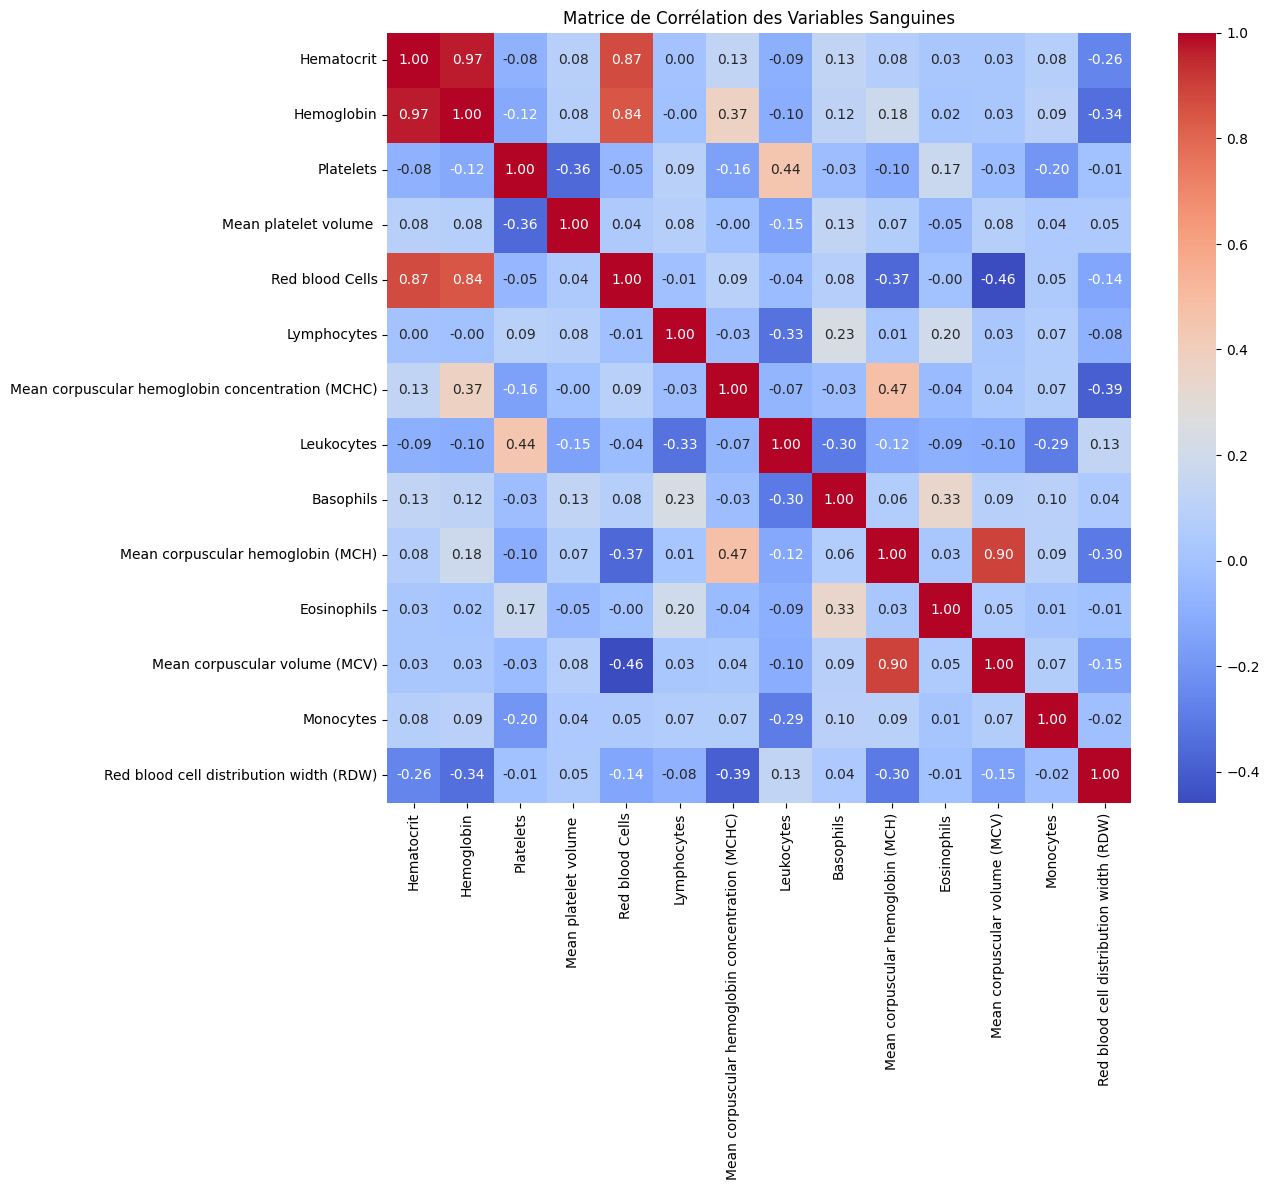

In [37]:
# Exercice 6 - Question 1 : Matrice de Corrélation
import matplotlib.pyplot as plt
import seaborn as sns

# On s'assure de prendre uniquement les colonnes numériques (les variables sanguines)
# Rappel : Ce sont les colonnes de type 'float64' dans ce dataset
blood_columns = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(12, 10))
# .corr() calcule le coefficient de Pearson (entre -1 et 1)
# annot=True affiche les chiffres dans les cases
# cmap='coolwarm' fait du Rouge (Positif) et Bleu (Négatif)
sns.heatmap(df[blood_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Matrice de Corrélation des Variables Sanguines")
plt.show()

Les va